# Capstone Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1c1fd811967e41bbbbcdd63b8a47f3d6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KriSlVh1Nuy4oY8LOydMzwpV0gYvVQUnPZc2-6owdhRp',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1c1fd811967e41bbbbcdd63b8a47f3d6.get_object(Bucket='capstone-donotdelete-pr-qx7mutvde6rkaq',Key='Accidents0515.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


### 1. Light Conditions

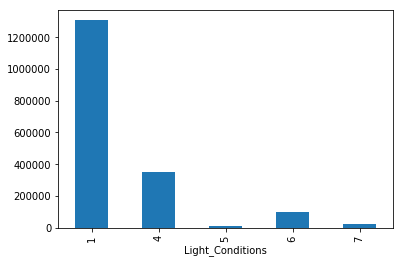

In [2]:
df_data_1_count = df_data_1.groupby(df_data_1.Light_Conditions).Accident_Severity.count().plot(kind = 'bar')

Based on the contexts of the dataset, we could noticed what are these diffierent number present:
 
  1: Daylight
  
  4: Darkness - Lights Lit
  
  5: Darkness - Lights Unlit
  
  6: Darkness - No Litting
  
  7: Darkness - Litting Unknown

### 2. Road Type

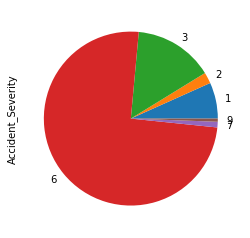

In [3]:
df_data_1_count = df_data_1.groupby(df_data_1.Road_Type).Accident_Severity.count().plot(kind = 'pie')

Based on the contexts of the dataset, we could noticed that these diffierent number present:

1: Roundabout

2: One way street

3: Dual carriageway

6: Single carriageway

7: Slip road

9: Unknown

### 3. Day of Week

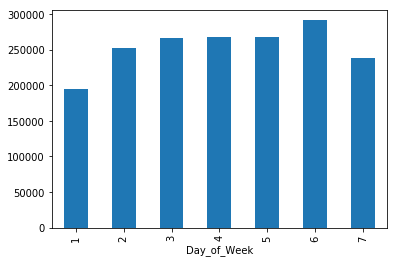

In [4]:
df_data_1_count = df_data_1.groupby(df_data_1.Day_of_Week).Accident_Severity.count().plot(kind = 'bar')

### 4. Accident Severity

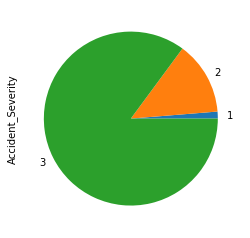

In [5]:
df_data_1_count = df_data_1.groupby(df_data_1.Accident_Severity).Accident_Severity.count().plot(kind = 'pie')

Based on the contexts of the dataset, we could noticed that these diffierent number present:

1: Fatal

2: Serious

3: Slight

### 5. Correlation

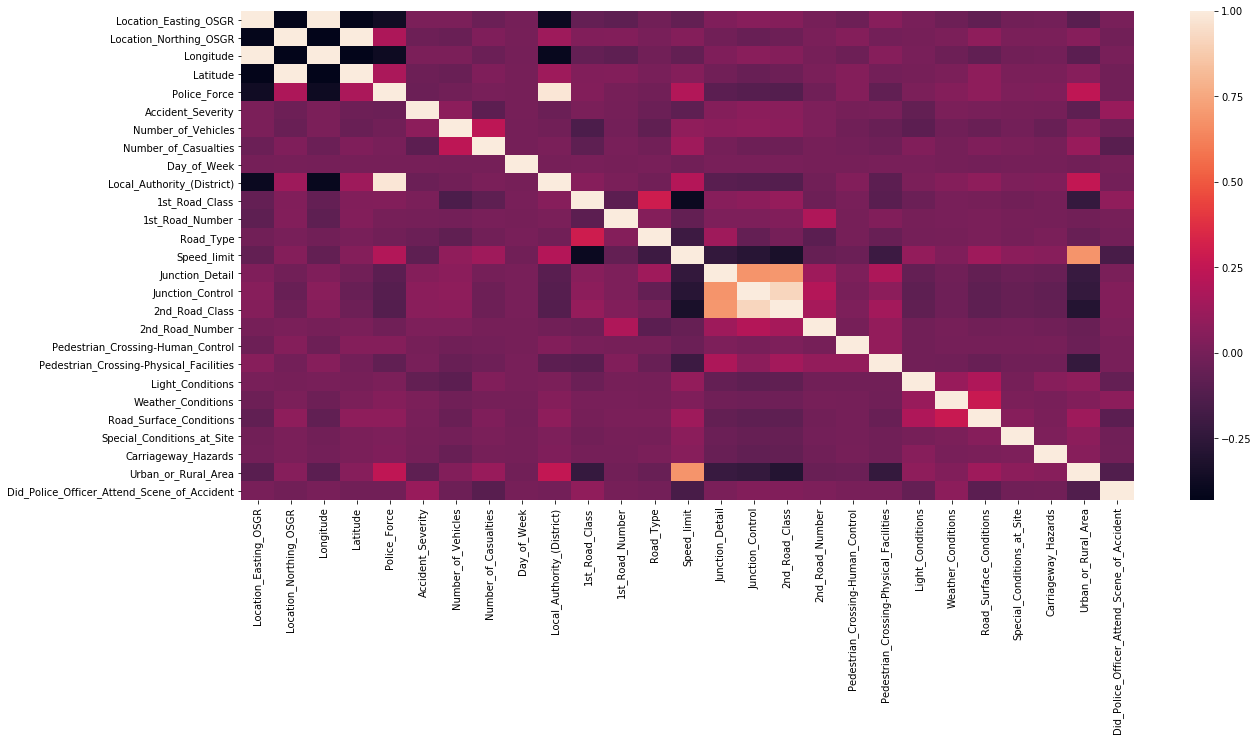

In [17]:
corr =  df_data_1.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

### 7. Logistic Regression

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [42]:
accident_ml = df_data_1.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Light_Conditions', 'Road_Type' ,'Day_of_Week', 'Police_Force', 'Speed_limit']]

X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              df_data_1['Accident_Severity'].values,test_size=0.20, random_state=99)

In [43]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/en

Accuracy 85.21
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000      4570
           2   0.000000  0.000000  0.000000     48084
           3   0.852150  1.000000  0.920174    303477

   micro avg   0.852150  0.852150  0.852150    356131
   macro avg   0.284050  0.333333  0.306725    356131
weighted avg   0.726159  0.852150  0.784126    356131



Predicted,3,All
Actual,,
1,4570,4570
2,48084,48084
3,303477,303477
All,356131,356131


### 8. Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)

pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 85.01
              precision    recall  f1-score   support

           1   0.018868  0.000438  0.000855      4570
           2   0.177840  0.003972  0.007771     48084
           3   0.852354  0.996926  0.918989    303477

   micro avg   0.850072  0.850072  0.850072    356131
   macro avg   0.349687  0.333778  0.309205    356131
weighted avg   0.750587  0.850072  0.784176    356131



Predicted,1,2,3,All
Actual,,,,
1,2,27,4541,4570
2,27,191,47866,48084
3,77,856,302544,303477
All,106,1074,354951,356131
